In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Read the data into the workspace
df_1 = pd.read_csv("/kaggle/input/titanic/train.csv")
df_2 = pd.read_csv("/kaggle/input/titanic/test.csv")

# Make working copies
train_df = df_1.copy()
test_df = df_2.copy()

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# import necessary dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats

%matplotlib inline

In [5]:
train_df.drop('Cabin', axis=1,inplace=True)
test_df.drop('Cabin', axis=1,inplace=True)

train_df.drop('Name', axis=1,inplace=True)
test_df.drop('Name', axis=1,inplace=True)

<Axes: xlabel='Survived', ylabel='count'>

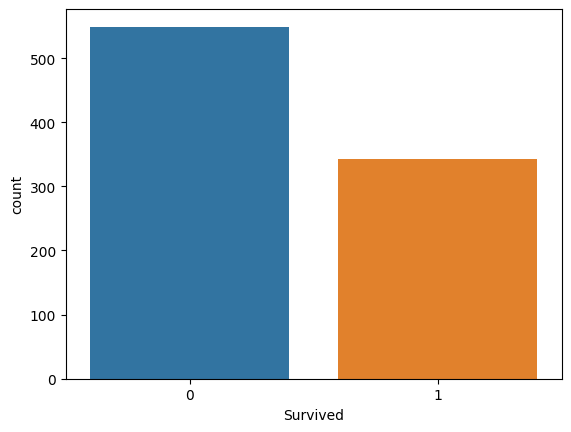

In [6]:
sns.countplot(x=train_df['Survived'])

In [7]:
all_features_train = train_df.columns.tolist()
all_features_test = test_df.columns.tolist()

In [8]:
categorical_columns_train = train_df.select_dtypes(include=['object']).columns.tolist()
numerical_columns_train = train_df.select_dtypes(include=['number']).columns.tolist()

In [9]:
print("Categorical features train: ", categorical_columns_train)
print("Numerical features train: ", numerical_columns_train)

Categorical features train:  ['Sex', 'Ticket', 'Embarked']
Numerical features train:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [10]:
numerical_columns_train.remove('PassengerId')
numerical_columns_train.remove('Survived')

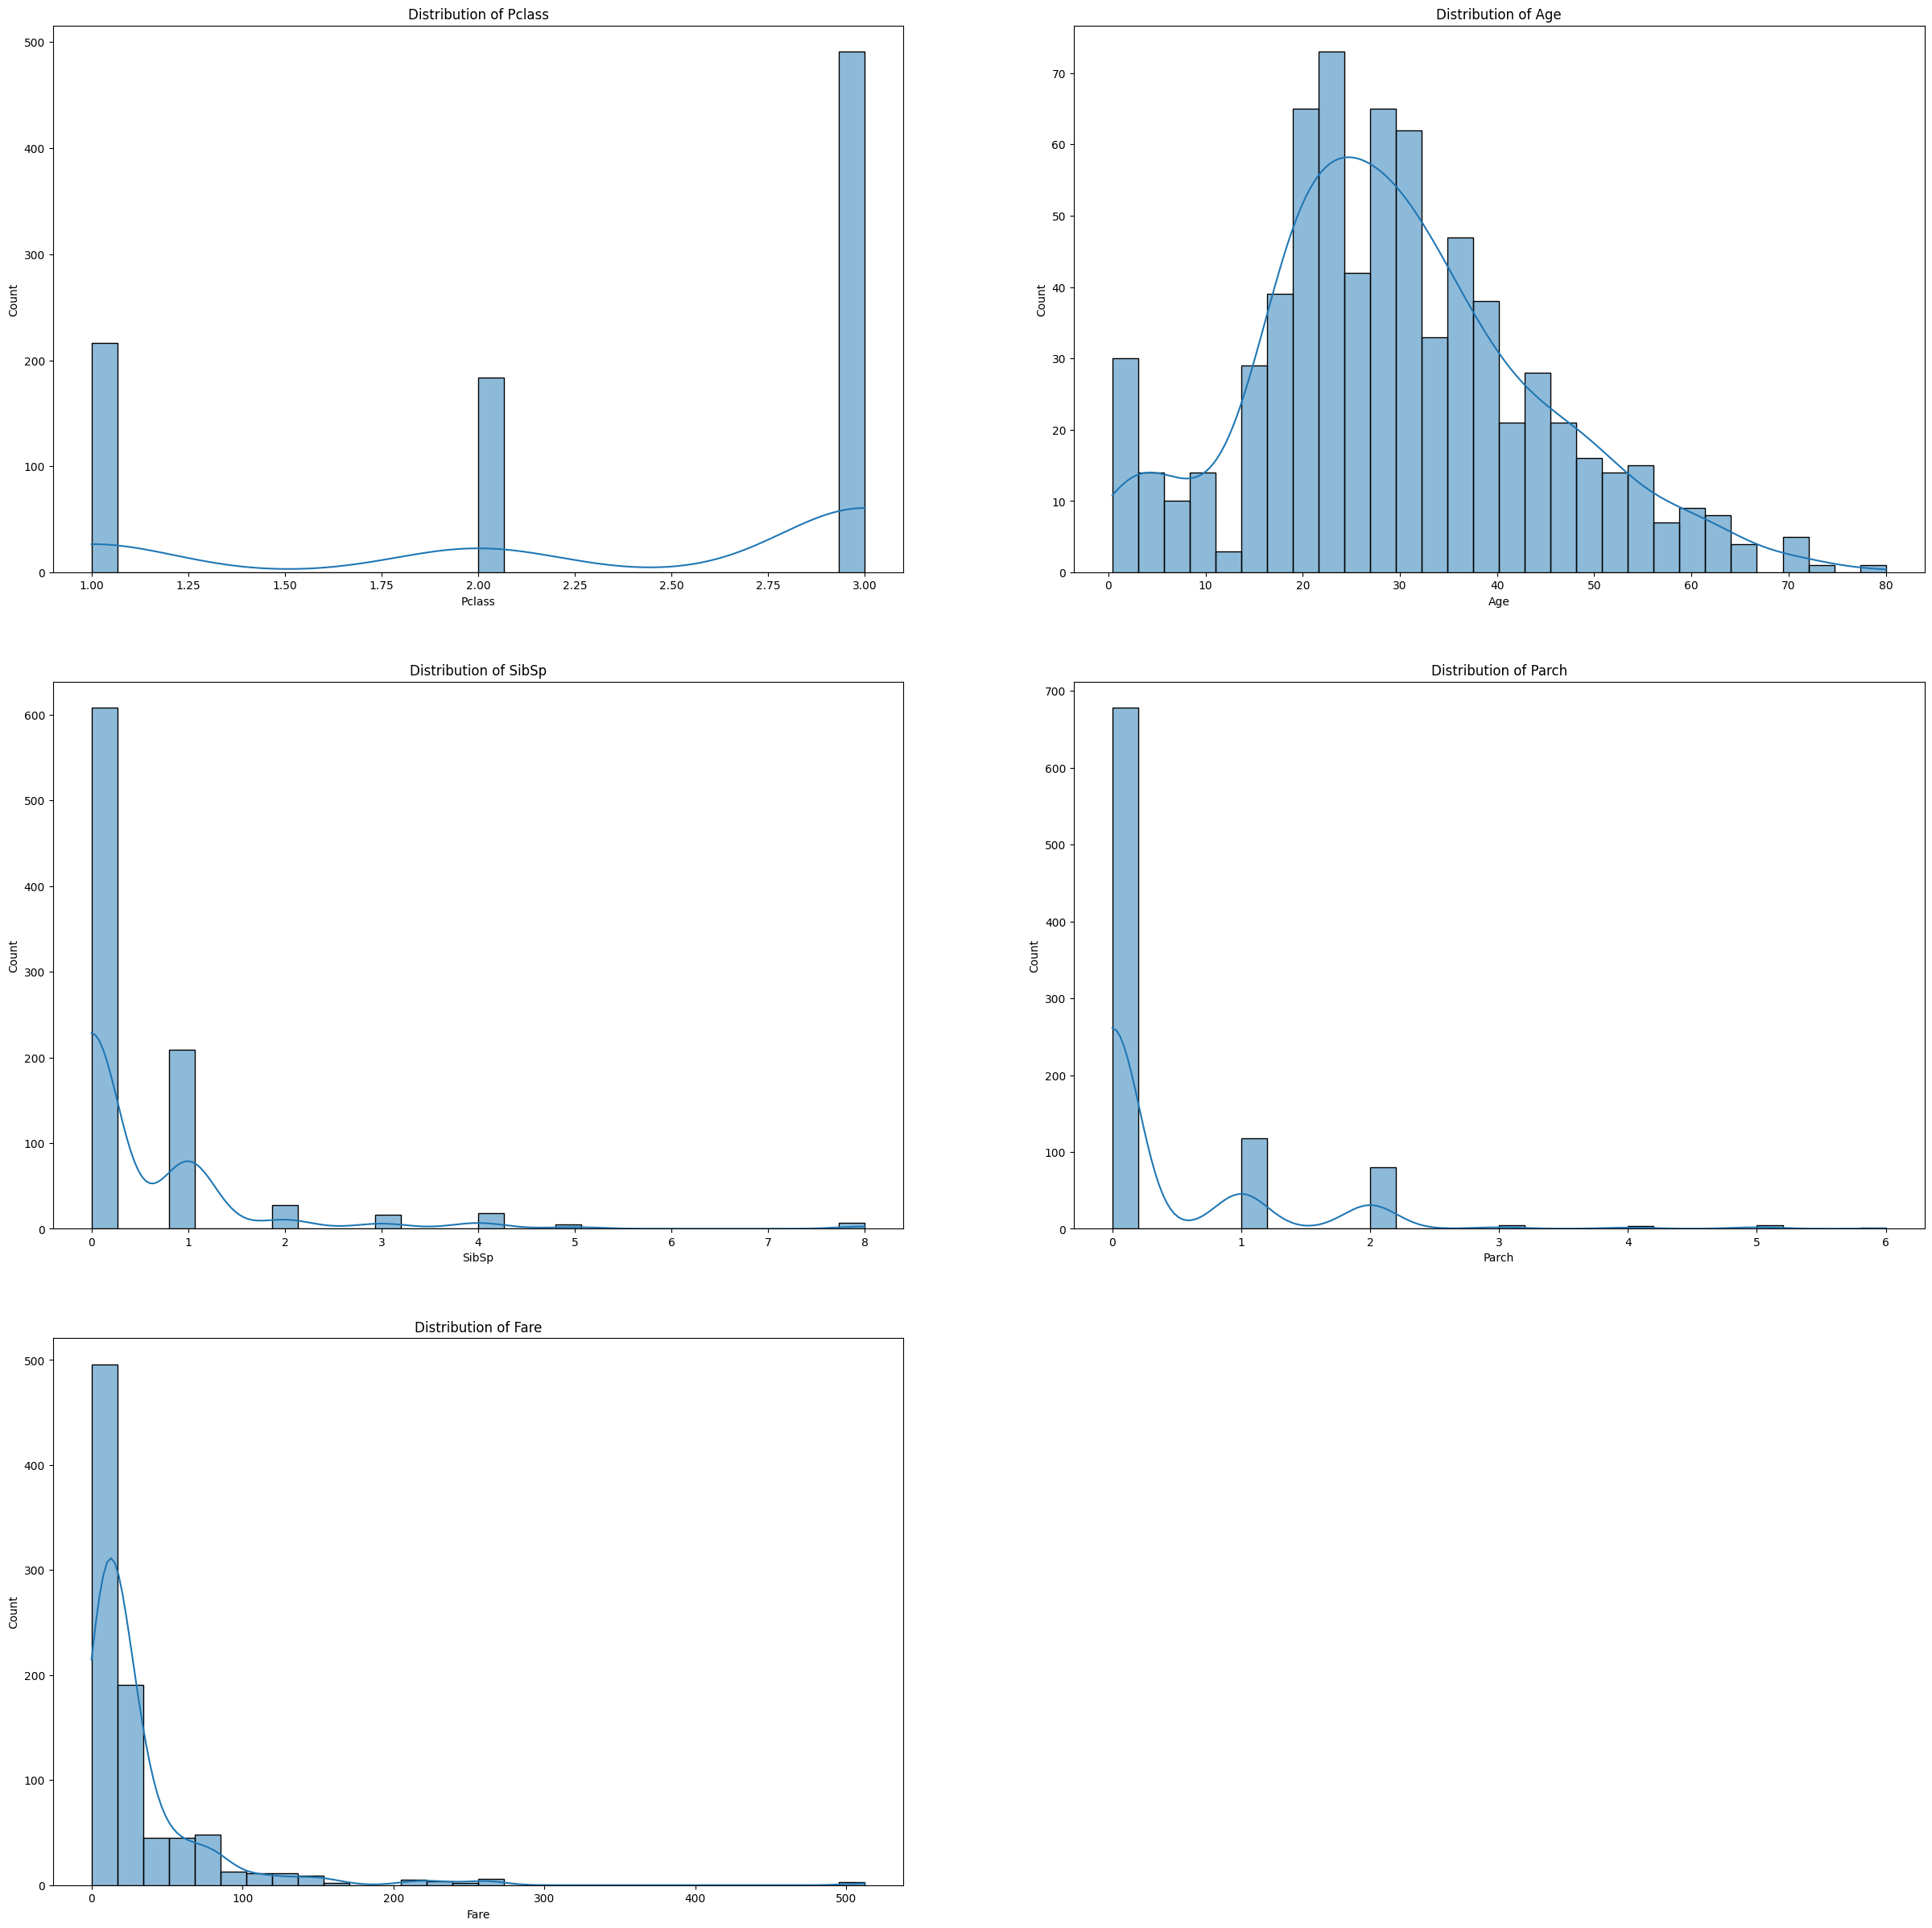

In [11]:
column_list = numerical_columns_train

# Calculate number of rows and cols based on list length
num_rows = len(column_list) // 2 + (len(column_list) % 2 > 0)
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 30))

# Plot each column in a loop
for idx, column in enumerate(column_list):
    row = idx // num_cols
    col = idx % num_cols
    sns.histplot(data=train_df, x=column, ax=axes[row, col], bins=30, kde=True)
    axes[row, col].set_title(f"Distribution of {column}")

# Remove any empty subplots
for idx in range(len(column_list), num_rows * num_cols):
    fig.delaxes(axes.flatten()[idx])

plt.show()


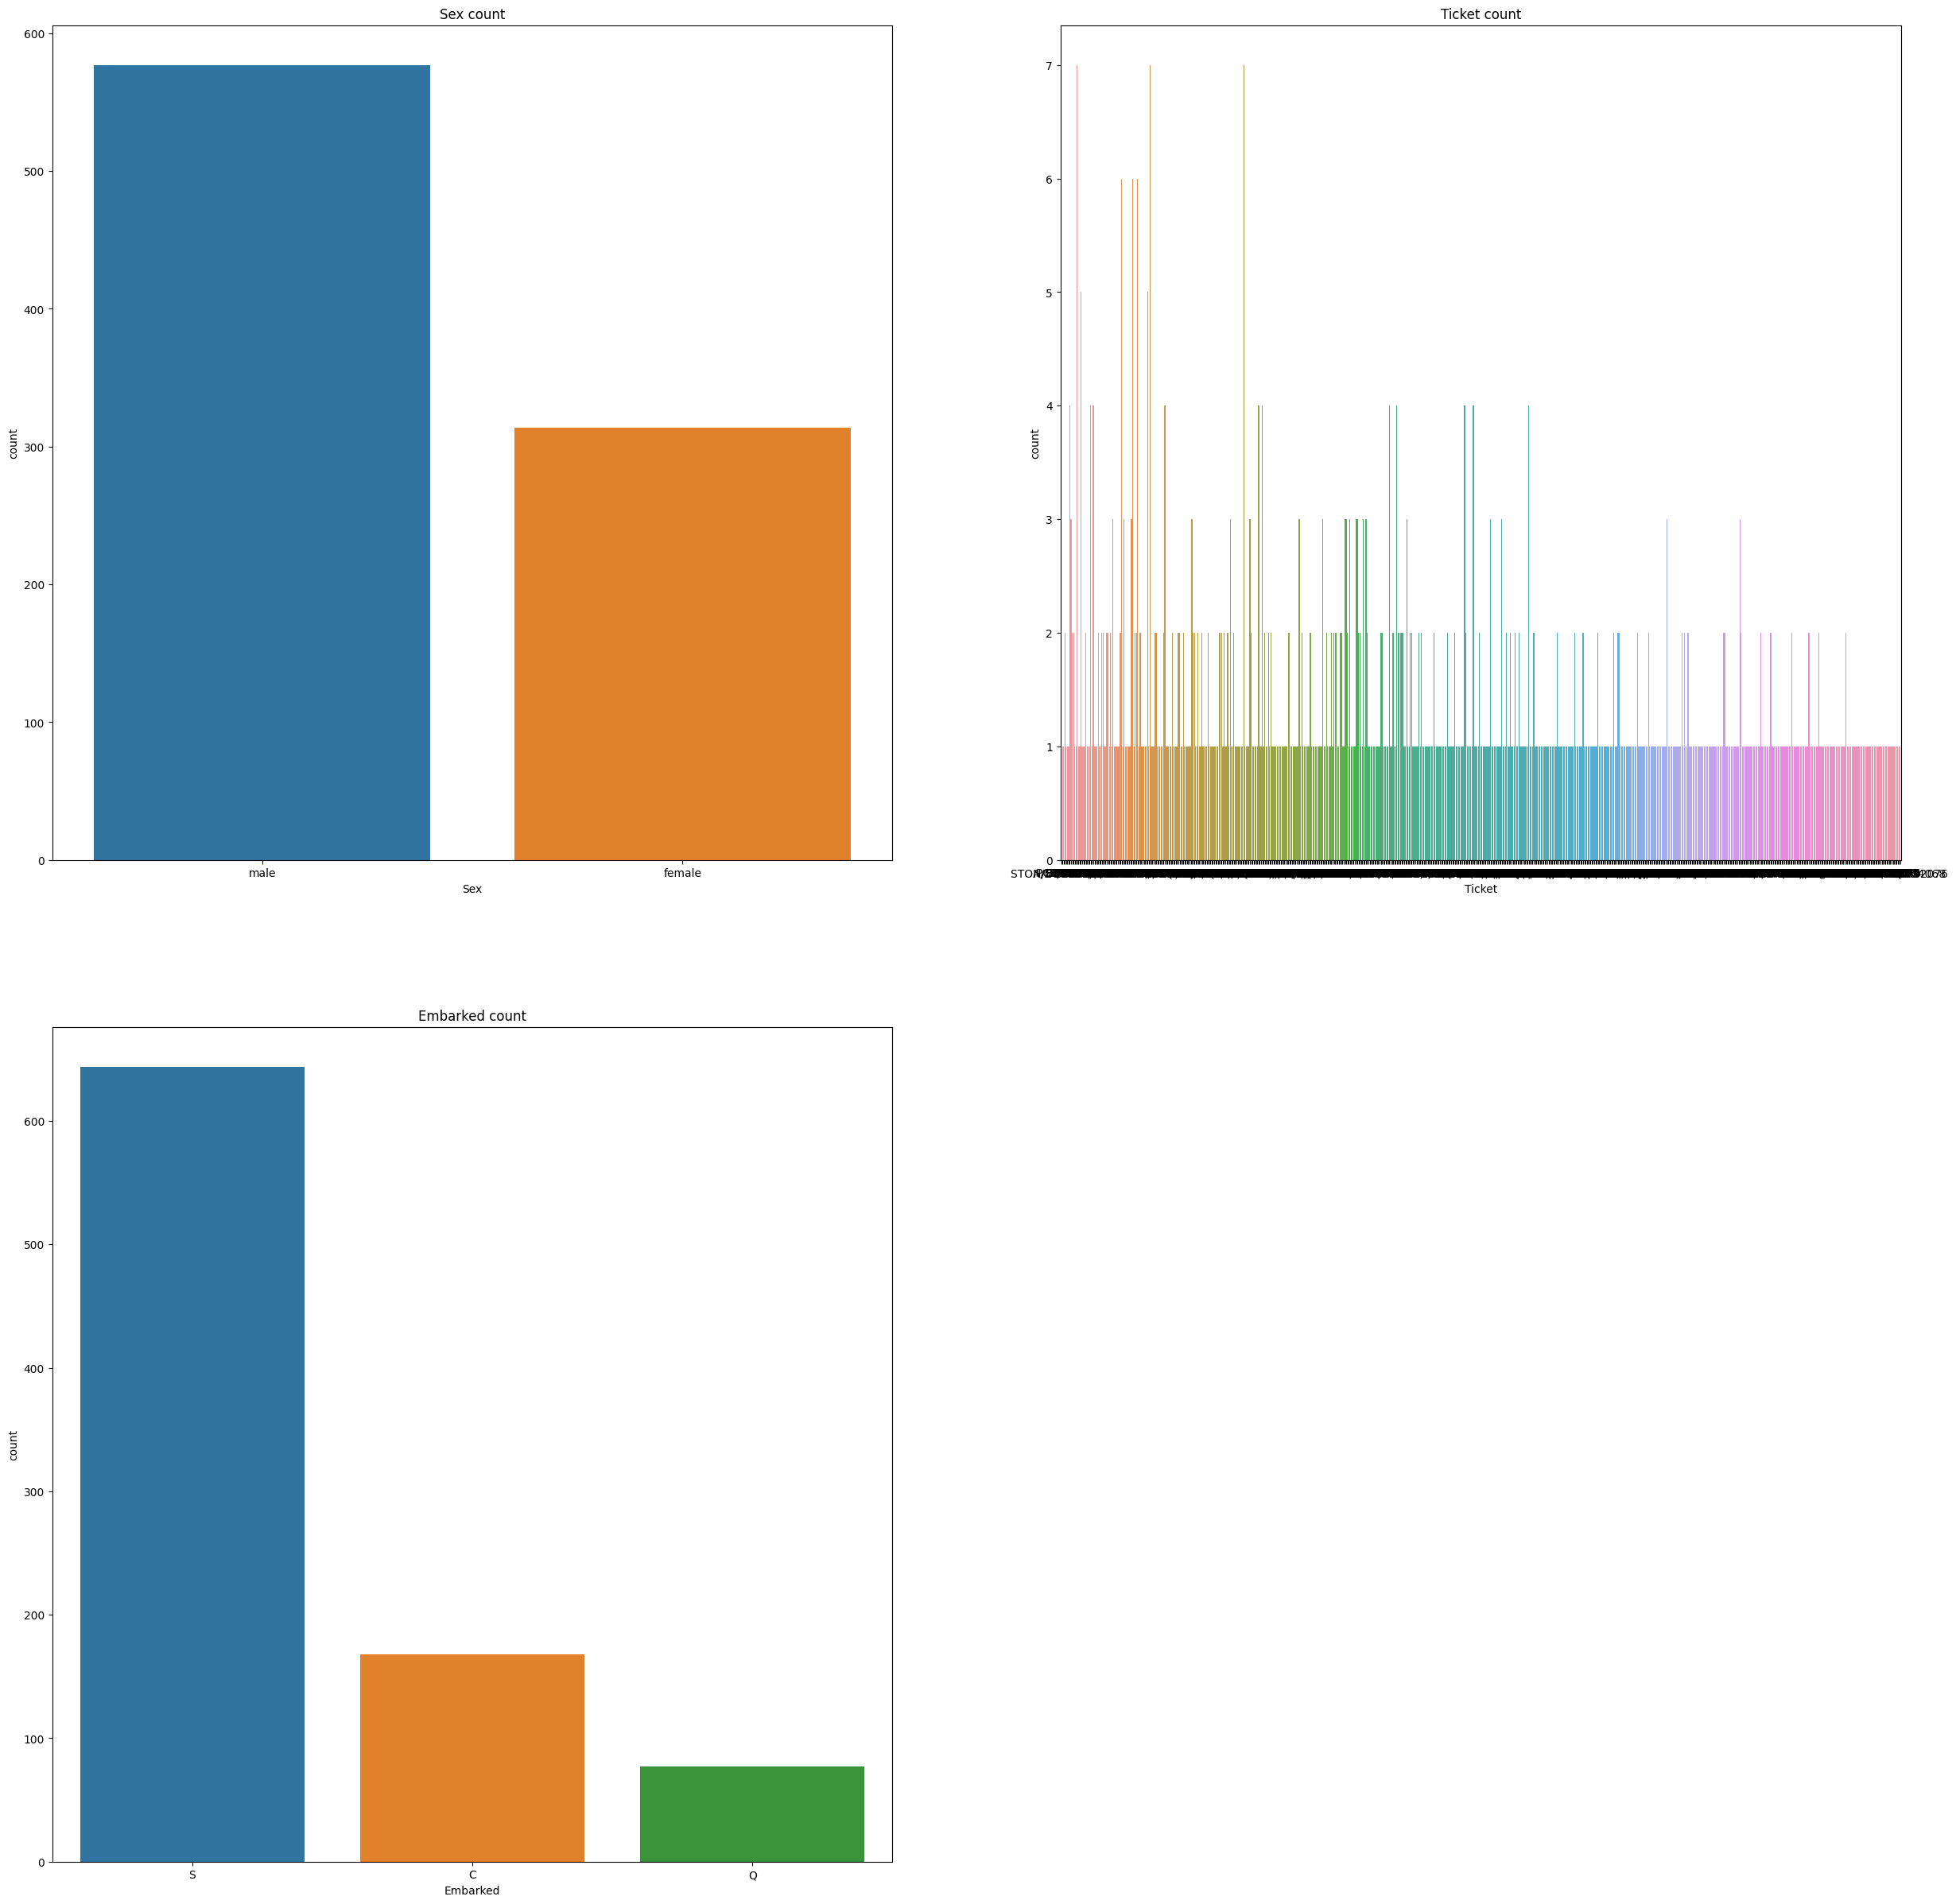

In [12]:

# Univariate analysis

#Countplots for each of the categorical columns
column_list = categorical_columns_train

#Calculate number of rows and cols based on list length
num_rows = len(column_list) // 2 + (len(column_list) % 2 >0)
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30,30))

# Plot each column in a loop
for idx, column in enumerate(column_list):
    row = idx // num_cols
    col = idx % num_cols
    sns.countplot(x=train_df[column], ax=axes[row, col])
    axes[row, col].set_title(f"{column} count")

# Remove any empty suplots
for idx in range(len(column_list), num_rows * num_cols):
    fig.delaxes(axes.flatten()[idx])


plt.show()

In [13]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [14]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df.dropna(subset=['Embarked'], inplace=True)
train_df.isnull().sum()

test_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df.dropna(subset=['Embarked'], inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

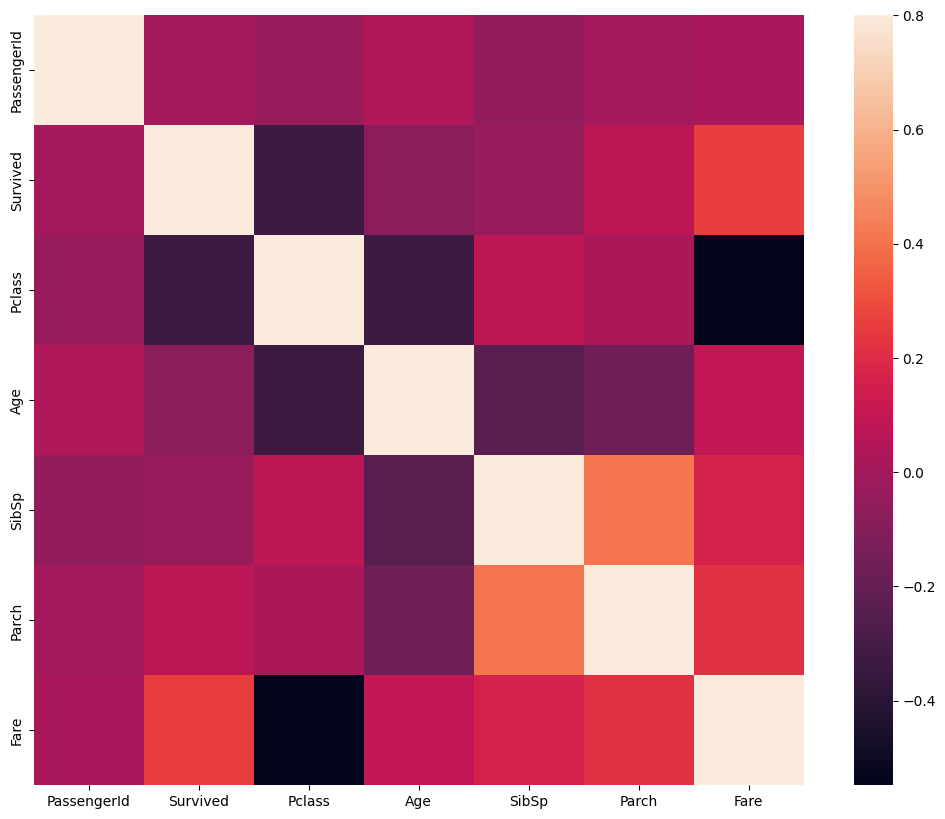

In [15]:
# Using a correlation matrix
corr_mat = train_df.corr(numeric_only=True)

f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(corr_mat, vmax=.8, square=True)


In [16]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [17]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [18]:
train_df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

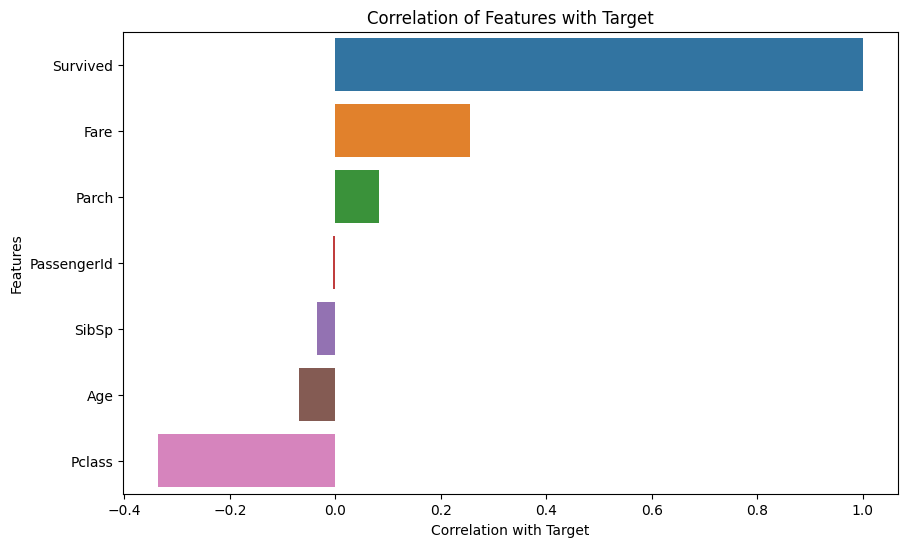

In [19]:
# Filter out non-numeric columns 
numeric_columns = train_df.select_dtypes(include=['number'])

# Calculate the correlation with the target
corr_with_target = numeric_columns.corrwith(train_df['Survived']).sort_values(ascending=False)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a bar plot of the correlation values
sns.barplot(x=corr_with_target, y=corr_with_target.index)

# Add labels
plt.xlabel('Correlation with Target')
plt.ylabel('Features')
plt.title('Correlation of Features with Target')
plt.show()



In [20]:
from sklearn.preprocessing import OrdinalEncoder

In [21]:
# List of features to encode
features = ['Sex', 'Ticket', 'Embarked']

# Store the original column names for train and test
original_column_names_train = train_df[features].columns.tolist()
original_column_names_test = test_df[features].columns.tolist()

# Init ordinal encoders
encoder_trn = OrdinalEncoder()
encoder_tst = OrdinalEncoder()

# Fit and transform the encoder on the train and test data
train_df_encoded = pd.DataFrame(encoder_trn.fit_transform(train_df[features]),
                                columns=original_column_names_train)

test_df_encoded = pd.DataFrame(encoder_tst.fit_transform(test_df[features]),
                               columns=original_column_names_test)

# Reset index for the original and encoded Dataframes
train_df.reset_index(drop=True, inplace=True)
train_df_encoded.reset_index(drop=True, inplace=True)

test_df.reset_index(drop=True, inplace=True)
test_df_encoded.reset_index(drop=True, inplace=True)

# Concatenate encoded Dataframrd with originals
train_df_final = pd.concat([train_df.drop(columns=features), train_df_encoded], axis=1)
test_df_final = pd.concat([test_df.drop(columns=features), test_df_encoded], axis=1)

In [22]:
print("Original DataFrame:")
print(train_df)
print("\nDataFrame after ordinal encoding:")
print(train_df_final)


Original DataFrame:
     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0              1         0       3    male  22.0      1      0   
1              2         1       1  female  38.0      1      0   
2              3         1       3  female  26.0      0      0   
3              4         1       1  female  35.0      1      0   
4              5         0       3    male  35.0      0      0   
..           ...       ...     ...     ...   ...    ...    ...   
884          887         0       2    male  27.0      0      0   
885          888         1       1  female  19.0      0      0   
886          889         0       3  female  28.0      1      2   
887          890         1       1    male  26.0      0      0   
888          891         0       3    male  32.0      0      0   

               Ticket     Fare Embarked  
0           A/5 21171   7.2500        S  
1            PC 17599  71.2833        C  
2    STON/O2. 3101282   7.9250        S  
3              1138

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.6+ KB


In [24]:
num_cols = ['Age', 'Ticket', 'Fare']

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_df_final[num_cols] = scaler.fit_transform(train_df_final[num_cols])
test_df_final[num_cols] = scaler.transform(test_df_final[num_cols])

In [26]:
# Final check
for col_train, col_test in zip(train_df_final.columns, test_df_final.columns):
    print(train_df_final[col_train].isna().sum())
    print(test_df_final[col_test].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [27]:
test_df.isnull().sum()


PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [28]:
# Define our final features
final_features = ['Age', 'Sex', 'Ticket', 'Embarked', 'Parch', 'Pclass', 'SibSp']

In [29]:
X = train_df_final[final_features]
y = train_df_final['Survived']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=1)

In [31]:
# Print the size of the resulting sets
print(f'Train set set size: {len(X_train)}')
print(f'Validation set size: {len(X_val)}')

Train set set size: 711
Validation set size: 178


In [32]:
# import necessary dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import optuna


In [33]:
# Define the objective function for Optuna to optimize
models = ['GaussianNB', 'KNeighborsClassifier', 'LogisticRegression',
          'RandomForestClassifier', 'SVC']

# Define an objective function for Optuna to optimize
def objective(trial):
    model_name = trial.suggest_categorical('model', models)

    if model_name == 'LogisticRegression':
        model = LogisticRegression()
    elif model_name == 'GaussianNB':
        model = GaussianNB()
    elif model_name == 'KNeighborsClassifier':
        model = KNeighborsClassifier()
    elif model_name == 'RandomForestClassifier':
        n_estimators = trial.suggest_int('n_estimators', 10, 100)
        max_depth = trial.suggest_int('max_depth', 2, 20)
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    elif model_name == 'SVC':
        model = SVC()

    # Perform cross validation with 5 folds
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5)

    # Calculate the mean accuracy scores
    accuracy_mean = scores.mean()
    
    return accuracy_mean

# Create an Optuna study
study = optuna.create_study(direction='maximize')

# Optimize the objective function for each model
for _ in range(100):  # Repeat for 100 trials
    study.optimize(objective, n_trials=1)

    # Print the best hyperparameters and objective value for each model
    best_params = study.best_params
    best_accuracy = study.best_value
    print(f"Best Hyperparameters ({study.best_trial.params['model']}):", best_params)
    print(f"Best Mean Accuracy ({study.best_trial.params['model']}):", best_accuracy)
    print("\n")

[I 2023-10-14 22:20:50,065] A new study created in memory with name: no-name-a68acd9c-6372-48fa-9d1f-7d26cc3cd0ce
[I 2023-10-14 22:20:50,126] Trial 0 finished with value: 0.8143307396828524 and parameters: {'model': 'SVC'}. Best is trial 0 with value: 0.8143307396828524.
[I 2023-10-14 22:20:50,186] Trial 1 finished with value: 0.8143307396828524 and parameters: {'model': 'SVC'}. Best is trial 0 with value: 0.8143307396828524.
[I 2023-10-14 22:20:50,242] Trial 2 finished with value: 0.7805279227814439 and parameters: {'model': 'KNeighborsClassifier'}. Best is trial 0 with value: 0.8143307396828524.


Best Hyperparameters (SVC): {'model': 'SVC'}
Best Mean Accuracy (SVC): 0.8143307396828524


Best Hyperparameters (SVC): {'model': 'SVC'}
Best Mean Accuracy (SVC): 0.8143307396828524


Best Hyperparameters (SVC): {'model': 'SVC'}
Best Mean Accuracy (SVC): 0.8143307396828524




[I 2023-10-14 22:20:50,465] Trial 3 finished with value: 0.7946124298236974 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 31, 'max_depth': 13}. Best is trial 0 with value: 0.8143307396828524.


Best Hyperparameters (SVC): {'model': 'SVC'}
Best Mean Accuracy (SVC): 0.8143307396828524




[I 2023-10-14 22:20:50,866] Trial 4 finished with value: 0.8002560819462229 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 60, 'max_depth': 16}. Best is trial 0 with value: 0.8143307396828524.
[I 2023-10-14 22:20:50,888] Trial 5 finished with value: 0.7622771594602581 and parameters: {'model': 'GaussianNB'}. Best is trial 0 with value: 0.8143307396828524.


Best Hyperparameters (SVC): {'model': 'SVC'}
Best Mean Accuracy (SVC): 0.8143307396828524


Best Hyperparameters (SVC): {'model': 'SVC'}
Best Mean Accuracy (SVC): 0.8143307396828524




[I 2023-10-14 22:20:51,435] Trial 6 finished with value: 0.819944843888506 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 88, 'max_depth': 8}. Best is trial 6 with value: 0.819944843888506.
[I 2023-10-14 22:20:51,473] Trial 7 finished with value: 0.7875997242194426 and parameters: {'model': 'LogisticRegression'}. Best is trial 6 with value: 0.819944843888506.
[I 2023-10-14 22:20:51,531] Trial 8 finished with value: 0.7805279227814439 and parameters: {'model': 'KNeighborsClassifier'}. Best is trial 6 with value: 0.819944843888506.
[I 2023-10-14 22:20:51,584] Trial 9 finished with value: 0.7805279227814439 and parameters: {'model': 'KNeighborsClassifier'}. Best is trial 6 with value: 0.819944843888506.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 88, 'max_depth': 8}
Best Mean Accuracy (RandomForestClassifier): 0.819944843888506


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 88, 'max_depth': 8}
Best Mean Accuracy (RandomForestClassifier): 0.819944843888506


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 88, 'max_depth': 8}
Best Mean Accuracy (RandomForestClassifier): 0.819944843888506


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 88, 'max_depth': 8}
Best Mean Accuracy (RandomForestClassifier): 0.819944843888506




[I 2023-10-14 22:20:52,113] Trial 10 finished with value: 0.8016448340392002 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 97, 'max_depth': 2}. Best is trial 6 with value: 0.819944843888506.
[I 2023-10-14 22:20:52,175] Trial 11 finished with value: 0.8143307396828524 and parameters: {'model': 'SVC'}. Best is trial 6 with value: 0.819944843888506.
[I 2023-10-14 22:20:52,235] Trial 12 finished with value: 0.8143307396828524 and parameters: {'model': 'SVC'}. Best is trial 6 with value: 0.819944843888506.
[I 2023-10-14 22:20:52,267] Trial 13 finished with value: 0.7875997242194426 and parameters: {'model': 'LogisticRegression'}. Best is trial 6 with value: 0.819944843888506.
[I 2023-10-14 22:20:52,291] Trial 14 finished with value: 0.7622771594602581 and parameters: {'model': 'GaussianNB'}. Best is trial 6 with value: 0.819944843888506.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 88, 'max_depth': 8}
Best Mean Accuracy (RandomForestClassifier): 0.819944843888506


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 88, 'max_depth': 8}
Best Mean Accuracy (RandomForestClassifier): 0.819944843888506


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 88, 'max_depth': 8}
Best Mean Accuracy (RandomForestClassifier): 0.819944843888506


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 88, 'max_depth': 8}
Best Mean Accuracy (RandomForestClassifier): 0.819944843888506


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 88, 'max_depth': 8}
Best Mean Accuracy (RandomForestClassifier): 0.819944843888506




[I 2023-10-14 22:20:52,352] Trial 15 finished with value: 0.8143307396828524 and parameters: {'model': 'SVC'}. Best is trial 6 with value: 0.819944843888506.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 88, 'max_depth': 8}
Best Mean Accuracy (RandomForestClassifier): 0.819944843888506




[I 2023-10-14 22:20:52,938] Trial 16 finished with value: 0.8312124495223087 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:20:53,521] Trial 17 finished with value: 0.8312124495223087 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:20:54,106] Trial 18 finished with value: 0.8312124495223087 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:20:54,558] Trial 19 finished with value: 0.8115138382744016 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 70, 'max_depth': 8}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:20:54,994] Trial 20 finished with value: 0.7988279326307495 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 77, 'max_depth': 2}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:20:55,599] Trial 21 finished with value: 0.8283955481138581 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 6}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:20:56,197] Trial 22 finished with value: 0.8284053974194819 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 98, 'max_depth': 5}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:20:56,443] Trial 23 finished with value: 0.8255687973997834 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 37, 'max_depth': 5}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:20:56,990] Trial 24 finished with value: 0.812902590367379 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 83, 'max_depth': 10}. Best is trial 16 with value: 0.8312124495223087.
[I 2023-10-14 22:20:57,012] Trial 25 finished with value: 0.7622771594602581 and parameters: {'model': 'GaussianNB'}. Best is trial 16 with value: 0.8312124495223087.
[I 2023-10-14 22:20:57,054] Trial 26 finished with value: 0.7875997242194426 and parameters: {'model': 'LogisticRegression'}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:20:57,626] Trial 27 finished with value: 0.8002462326405988 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 85, 'max_depth': 20}. Best is trial 16 with value: 0.8312124495223087.
[I 2023-10-14 22:20:57,719] Trial 28 finished with value: 0.8044912833645228 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 10, 'max_depth': 4}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:20:58,337] Trial 29 finished with value: 0.8171279424800553 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 8}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:20:58,738] Trial 30 finished with value: 0.8072786368561017 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 69, 'max_depth': 3}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:20:59,315] Trial 31 finished with value: 0.8298039988180834 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 92, 'max_depth': 6}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:20:59,876] Trial 32 finished with value: 0.8298039988180834 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 90, 'max_depth': 6}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:00,441] Trial 33 finished with value: 0.8227617452969567 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 91, 'max_depth': 7}. Best is trial 16 with value: 0.8312124495223087.
[I 2023-10-14 22:21:00,496] Trial 34 finished with value: 0.7805279227814439 and parameters: {'model': 'KNeighborsClassifier'}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:01,008] Trial 35 finished with value: 0.8114941396631536 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 79, 'max_depth': 10}. Best is trial 16 with value: 0.8312124495223087.
[I 2023-10-14 22:21:01,033] Trial 36 finished with value: 0.7622771594602581 and parameters: {'model': 'GaussianNB'}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:01,571] Trial 37 finished with value: 0.8185659411011524 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 93, 'max_depth': 4}. Best is trial 16 with value: 0.8312124495223087.
[I 2023-10-14 22:21:01,607] Trial 38 finished with value: 0.7875997242194426 and parameters: {'model': 'LogisticRegression'}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:02,124] Trial 39 finished with value: 0.821382842509603 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 90, 'max_depth': 4}. Best is trial 16 with value: 0.8312124495223087.
[I 2023-10-14 22:21:02,178] Trial 40 finished with value: 0.7805279227814439 and parameters: {'model': 'KNeighborsClassifier'}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:02,793] Trial 41 finished with value: 0.8283955481138581 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 6}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:03,345] Trial 42 finished with value: 0.8298039988180834 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 90, 'max_depth': 6}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:03,922] Trial 43 finished with value: 0.8227617452969567 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 92, 'max_depth': 7}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:04,429] Trial 44 finished with value: 0.8283758495026101 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 83, 'max_depth': 5}. Best is trial 16 with value: 0.8312124495223087.
[I 2023-10-14 22:21:04,493] Trial 45 finished with value: 0.8143307396828524 and parameters: {'model': 'SVC'}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:04,981] Trial 46 finished with value: 0.8100856889589284 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 75, 'max_depth': 9}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:05,535] Trial 47 finished with value: 0.821382842509603 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 95, 'max_depth': 4}. Best is trial 16 with value: 0.8312124495223087.
[I 2023-10-14 22:21:05,557] Trial 48 finished with value: 0.7622771594602581 and parameters: {'model': 'GaussianNB'}. Best is trial 16 with value: 0.8312124495223087.
[I 2023-10-14 22:21:05,613] Trial 49 finished with value: 0.7805279227814439 and parameters: {'model': 'KNeighborsClassifier'}. Best is trial 16 with value: 0.8312124495223087.
[I 2023-10-14 22:21:05,645] Trial 50 finished with value: 0.7875997242194426 and parameters: {'model': 'LogisticRegression'}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:06,214] Trial 51 finished with value: 0.8298039988180834 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 89, 'max_depth': 6}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:06,783] Trial 52 finished with value: 0.8298039988180834 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 93, 'max_depth': 6}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:07,315] Trial 53 finished with value: 0.8227617452969567 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 86, 'max_depth': 7}. Best is trial 16 with value: 0.8312124495223087.
[I 2023-10-14 22:21:07,373] Trial 54 finished with value: 0.8143307396828524 and parameters: {'model': 'SVC'}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:07,759] Trial 55 finished with value: 0.7946321284349452 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 51, 'max_depth': 13}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:08,315] Trial 56 finished with value: 0.8086870875603271 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 3}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:08,870] Trial 57 finished with value: 0.8269969467152565 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 94, 'max_depth': 5}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:09,229] Trial 58 finished with value: 0.8044814340588988 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 52, 'max_depth': 12}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:09,732] Trial 59 finished with value: 0.8100955382645523 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 88, 'max_depth': 3}. Best is trial 16 with value: 0.8312124495223087.
[I 2023-10-14 22:21:09,791] Trial 60 finished with value: 0.8143307396828524 and parameters: {'model': 'SVC'}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:10,344] Trial 61 finished with value: 0.8298039988180834 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 89, 'max_depth': 6}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:10,934] Trial 62 finished with value: 0.8227617452969567 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 94, 'max_depth': 7}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:11,435] Trial 63 finished with value: 0.8255884960110313 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 81, 'max_depth': 6}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:12,038] Trial 64 finished with value: 0.819934994582882 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 96, 'max_depth': 8}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:12,565] Trial 65 finished with value: 0.8269870974096326 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 88, 'max_depth': 5}. Best is trial 16 with value: 0.8312124495223087.
[I 2023-10-14 22:21:12,590] Trial 66 finished with value: 0.7622771594602581 and parameters: {'model': 'GaussianNB'}. Best is trial 16 with value: 0.8312124495223087.
[I 2023-10-14 22:21:12,626] Trial 67 finished with value: 0.7875997242194426 and parameters: {'model': 'LogisticRegression'}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:13,169] Trial 68 finished with value: 0.8016448340392002 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 97, 'max_depth': 2}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:13,629] Trial 69 finished with value: 0.8086772382547032 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 71, 'max_depth': 9}. Best is trial 16 with value: 0.8312124495223087.
[I 2023-10-14 22:21:13,682] Trial 70 finished with value: 0.7805279227814439 and parameters: {'model': 'KNeighborsClassifier'}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:14,244] Trial 71 finished with value: 0.8298039988180834 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 93, 'max_depth': 6}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:14,876] Trial 72 finished with value: 0.8030631340490494 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 97, 'max_depth': 16}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:15,411] Trial 73 finished with value: 0.8269870974096326 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 89, 'max_depth': 5}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:15,795] Trial 74 finished with value: 0.81995469319413 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 60, 'max_depth': 6}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:16,431] Trial 75 finished with value: 0.8227617452969567 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 7}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:16,927] Trial 76 finished with value: 0.8199645424997538 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 84, 'max_depth': 4}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:17,176] Trial 77 finished with value: 0.8030631340490496 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 36, 'max_depth': 8}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:17,748] Trial 78 finished with value: 0.8284053974194819 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 96, 'max_depth': 5}. Best is trial 16 with value: 0.8312124495223087.
[I 2023-10-14 22:21:17,771] Trial 79 finished with value: 0.7622771594602581 and parameters: {'model': 'GaussianNB'}. Best is trial 16 with value: 0.8312124495223087.
[I 2023-10-14 22:21:17,901] Trial 80 finished with value: 0.8072884861617255 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 17, 'max_depth': 3}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:18,451] Trial 81 finished with value: 0.8298039988180834 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 90, 'max_depth': 6}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:18,964] Trial 82 finished with value: 0.8298039988180834 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 85, 'max_depth': 6}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:19,505] Trial 83 finished with value: 0.8255884960110311 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 91, 'max_depth': 5}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:19,988] Trial 84 finished with value: 0.8227617452969567 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 77, 'max_depth': 7}. Best is trial 16 with value: 0.8312124495223087.
[I 2023-10-14 22:21:20,030] Trial 85 finished with value: 0.7875997242194426 and parameters: {'model': 'LogisticRegression'}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:20,572] Trial 86 finished with value: 0.8185659411011524 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 93, 'max_depth': 4}. Best is trial 16 with value: 0.8312124495223087.
[I 2023-10-14 22:21:20,633] Trial 87 finished with value: 0.8143307396828524 and parameters: {'model': 'SVC'}. Best is trial 16 with value: 0.8312124495223087.
[I 2023-10-14 22:21:20,687] Trial 88 finished with value: 0.7805279227814439 and parameters: {'model': 'KNeighborsClassifier'}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:21,230] Trial 89 finished with value: 0.8312026002166848 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 87, 'max_depth': 6}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:21,847] Trial 90 finished with value: 0.8171180931744312 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 97, 'max_depth': 8}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:22,382] Trial 91 finished with value: 0.8298039988180834 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 86, 'max_depth': 6}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:22,919] Trial 92 finished with value: 0.8269870974096326 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 89, 'max_depth': 5}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:23,538] Trial 93 finished with value: 0.8227617452969567 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 7}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:24,045] Trial 94 finished with value: 0.8255884960110313 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 81, 'max_depth': 6}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:24,591] Trial 95 finished with value: 0.8255884960110311 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 91, 'max_depth': 5}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:25,140] Trial 96 finished with value: 0.8171574903969271 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 94, 'max_depth': 4}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:25,737] Trial 97 finished with value: 0.8283955481138581 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 98, 'max_depth': 6}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:26,327] Trial 98 finished with value: 0.812902590367379 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 87, 'max_depth': 9}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




[I 2023-10-14 22:21:26,832] Trial 99 finished with value: 0.824170196001182 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 81, 'max_depth': 7}. Best is trial 16 with value: 0.8312124495223087.


Best Hyperparameters (RandomForestClassifier): {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 5}
Best Mean Accuracy (RandomForestClassifier): 0.8312124495223087




In [34]:
 # Define the objective function for Optuna to optimize
gb_models = ['LGBMClassifier', 'XGBClassifier']

# Define an objective function for Optuna to optimize
def objective(trial):
    model_name = trial.suggest_categorical('model', gb_models)

    if model_name == 'LGBMClassifier':
        num_leaves = trial.suggest_int('num_leaves', 2, 10)
        learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)
        model = LGBMClassifier(num_leaves=num_leaves, learning_rate=learning_rate, random_state=42)
    elif model_name == 'XGBClassifier':
        n_estimators = trial.suggest_int('n_estimators', 10, 50)
        max_depth = trial.suggest_int('max_depth', 2, 6)
        learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)
        model = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)

    # Perform cross validation with 3 folds (to save resources)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=3)

    # Calculate the mean accuracy scores
    accuracy_mean = scores.mean()
    
    return accuracy_mean

# Create an Optuna study
study_2 = optuna.create_study(direction='maximize')

# Optimize the objective function for each model (with fewer trials)
for _ in range(30):  # Repeat for 30 trials
    study_2.optimize(objective, n_trials=1)

    # Print the best hyperparameters and objective value for each model
    best_params = study_2.best_params
    best_accuracy = study_2.best_value
    print(f"Best Hyperparameters ({study_2.best_trial.params['model']}):", best_params)
    print(f"Best Mean Accuracy ({study_2.best_trial.params['model']}):", best_accuracy)
    print("\n")

[I 2023-10-14 22:21:26,880] A new study created in memory with name: no-name-22d10de2-2d5b-44e1-9e1f-2b07fce2ea7b
/tmp/ipykernel_20/1963541557.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)
[I 2023-10-14 22:21:26,959] Trial 0 finished with value: 0.7848101265822786 and parameters: {'model': 'XGBClassifier', 'n_estimators': 31, 'max_depth': 2, 'learning_rate': 0.06270169953740806}. Best is trial 0 with value: 0.7848101265822786.
/tmp/ipykernel_20/1963541557.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)
[I 2023-10-14 22:21:

Best Hyperparameters (XGBClassifier): {'model': 'XGBClassifier', 'n_estimators': 31, 'max_depth': 2, 'learning_rate': 0.06270169953740806}
Best Mean Accuracy (XGBClassifier): 0.7848101265822786


Best Hyperparameters (XGBClassifier): {'model': 'XGBClassifier', 'n_estimators': 23, 'max_depth': 3, 'learning_rate': 0.04356842508001853}
Best Mean Accuracy (XGBClassifier): 0.8199718706047822




[I 2023-10-14 22:21:27,704] Trial 2 finished with value: 0.8298171589310831 and parameters: {'model': 'LGBMClassifier', 'num_leaves': 7, 'learning_rate': 0.040092174499882546}. Best is trial 2 with value: 0.8298171589310831.
/tmp/ipykernel_20/1963541557.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)
[I 2023-10-14 22:21:27,897] Trial 3 finished with value: 0.7749648382559774 and parameters: {'model': 'LGBMClassifier', 'num_leaves': 2, 'learning_rate': 0.028812871241264502}. Best is trial 2 with value: 0.8298171589310831.
/tmp/ipykernel_20/1963541557.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instea

Best Hyperparameters (LGBMClassifier): {'model': 'LGBMClassifier', 'num_leaves': 7, 'learning_rate': 0.040092174499882546}
Best Mean Accuracy (LGBMClassifier): 0.8298171589310831


Best Hyperparameters (LGBMClassifier): {'model': 'LGBMClassifier', 'num_leaves': 7, 'learning_rate': 0.040092174499882546}
Best Mean Accuracy (LGBMClassifier): 0.8298171589310831




[I 2023-10-14 22:21:28,593] Trial 4 finished with value: 0.8312236286919831 and parameters: {'model': 'LGBMClassifier', 'num_leaves': 7, 'learning_rate': 0.0482170780316856}. Best is trial 4 with value: 0.8312236286919831.
/tmp/ipykernel_20/1963541557.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)
[I 2023-10-14 22:21:28,658] Trial 5 finished with value: 0.7876230661040787 and parameters: {'model': 'XGBClassifier', 'n_estimators': 36, 'max_depth': 6, 'learning_rate': 0.02944246343309446}. Best is trial 4 with value: 0.8312236286919831.
/tmp/ipykernel_20/1963541557.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., l

Best Hyperparameters (LGBMClassifier): {'model': 'LGBMClassifier', 'num_leaves': 7, 'learning_rate': 0.0482170780316856}
Best Mean Accuracy (LGBMClassifier): 0.8312236286919831


Best Hyperparameters (LGBMClassifier): {'model': 'LGBMClassifier', 'num_leaves': 7, 'learning_rate': 0.0482170780316856}
Best Mean Accuracy (LGBMClassifier): 0.8312236286919831


Best Hyperparameters (LGBMClassifier): {'model': 'LGBMClassifier', 'num_leaves': 7, 'learning_rate': 0.0482170780316856}
Best Mean Accuracy (LGBMClassifier): 0.8312236286919831


Best Hyperparameters (LGBMClassifier): {'model': 'LGBMClassifier', 'num_leaves': 7, 'learning_rate': 0.0482170780316856}
Best Mean Accuracy (LGBMClassifier): 0.8312236286919831




[I 2023-10-14 22:21:28,805] Trial 8 finished with value: 0.790436005625879 and parameters: {'model': 'XGBClassifier', 'n_estimators': 11, 'max_depth': 6, 'learning_rate': 0.05783939948731367}. Best is trial 4 with value: 0.8312236286919831.
/tmp/ipykernel_20/1963541557.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)


Best Hyperparameters (LGBMClassifier): {'model': 'LGBMClassifier', 'num_leaves': 7, 'learning_rate': 0.0482170780316856}
Best Mean Accuracy (LGBMClassifier): 0.8312236286919831




[I 2023-10-14 22:21:29,541] Trial 9 finished with value: 0.7960618846694797 and parameters: {'model': 'LGBMClassifier', 'num_leaves': 7, 'learning_rate': 0.013323758481308352}. Best is trial 4 with value: 0.8312236286919831.
/tmp/ipykernel_20/1963541557.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)


Best Hyperparameters (LGBMClassifier): {'model': 'LGBMClassifier', 'num_leaves': 7, 'learning_rate': 0.0482170780316856}
Best Mean Accuracy (LGBMClassifier): 0.8312236286919831




[I 2023-10-14 22:21:30,482] Trial 10 finished with value: 0.8045007032348804 and parameters: {'model': 'LGBMClassifier', 'num_leaves': 9, 'learning_rate': 0.09633225931846215}. Best is trial 4 with value: 0.8312236286919831.
/tmp/ipykernel_20/1963541557.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)


Best Hyperparameters (LGBMClassifier): {'model': 'LGBMClassifier', 'num_leaves': 7, 'learning_rate': 0.0482170780316856}
Best Mean Accuracy (LGBMClassifier): 0.8312236286919831




[I 2023-10-14 22:21:31,349] Trial 11 finished with value: 0.8326300984528833 and parameters: {'model': 'LGBMClassifier', 'num_leaves': 6, 'learning_rate': 0.04464227078092692}. Best is trial 11 with value: 0.8326300984528833.
/tmp/ipykernel_20/1963541557.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)


Best Hyperparameters (LGBMClassifier): {'model': 'LGBMClassifier', 'num_leaves': 6, 'learning_rate': 0.04464227078092692}
Best Mean Accuracy (LGBMClassifier): 0.8326300984528833




[I 2023-10-14 22:21:31,810] Trial 12 finished with value: 0.818565400843882 and parameters: {'model': 'LGBMClassifier', 'num_leaves': 4, 'learning_rate': 0.060080190113098474}. Best is trial 11 with value: 0.8326300984528833.
/tmp/ipykernel_20/1963541557.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)


Best Hyperparameters (LGBMClassifier): {'model': 'LGBMClassifier', 'num_leaves': 6, 'learning_rate': 0.04464227078092692}
Best Mean Accuracy (LGBMClassifier): 0.8326300984528833




[I 2023-10-14 22:21:32,355] Trial 13 finished with value: 0.8213783403656821 and parameters: {'model': 'LGBMClassifier', 'num_leaves': 5, 'learning_rate': 0.09253147059293204}. Best is trial 11 with value: 0.8326300984528833.
/tmp/ipykernel_20/1963541557.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)


Best Hyperparameters (LGBMClassifier): {'model': 'LGBMClassifier', 'num_leaves': 6, 'learning_rate': 0.04464227078092692}
Best Mean Accuracy (LGBMClassifier): 0.8326300984528833




[I 2023-10-14 22:21:33,315] Trial 14 finished with value: 0.8157524613220817 and parameters: {'model': 'LGBMClassifier', 'num_leaves': 9, 'learning_rate': 0.042146199239549674}. Best is trial 11 with value: 0.8326300984528833.
/tmp/ipykernel_20/1963541557.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)


Best Hyperparameters (LGBMClassifier): {'model': 'LGBMClassifier', 'num_leaves': 6, 'learning_rate': 0.04464227078092692}
Best Mean Accuracy (LGBMClassifier): 0.8326300984528833




[I 2023-10-14 22:21:33,941] Trial 15 finished with value: 0.8016877637130803 and parameters: {'model': 'LGBMClassifier', 'num_leaves': 6, 'learning_rate': 0.017315809532604556}. Best is trial 11 with value: 0.8326300984528833.
/tmp/ipykernel_20/1963541557.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)


Best Hyperparameters (LGBMClassifier): {'model': 'LGBMClassifier', 'num_leaves': 6, 'learning_rate': 0.04464227078092692}
Best Mean Accuracy (LGBMClassifier): 0.8326300984528833




[I 2023-10-14 22:21:34,780] Trial 16 finished with value: 0.8298171589310831 and parameters: {'model': 'LGBMClassifier', 'num_leaves': 8, 'learning_rate': 0.03696630639709807}. Best is trial 11 with value: 0.8326300984528833.
/tmp/ipykernel_20/1963541557.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)


Best Hyperparameters (LGBMClassifier): {'model': 'LGBMClassifier', 'num_leaves': 6, 'learning_rate': 0.04464227078092692}
Best Mean Accuracy (LGBMClassifier): 0.8326300984528833




[I 2023-10-14 22:21:35,284] Trial 17 finished with value: 0.8143459915611815 and parameters: {'model': 'LGBMClassifier', 'num_leaves': 4, 'learning_rate': 0.049170382483222044}. Best is trial 11 with value: 0.8326300984528833.
/tmp/ipykernel_20/1963541557.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)


Best Hyperparameters (LGBMClassifier): {'model': 'LGBMClassifier', 'num_leaves': 6, 'learning_rate': 0.04464227078092692}
Best Mean Accuracy (LGBMClassifier): 0.8326300984528833




[I 2023-10-14 22:21:36,429] Trial 18 finished with value: 0.8073136427566808 and parameters: {'model': 'LGBMClassifier', 'num_leaves': 10, 'learning_rate': 0.06871095429440119}. Best is trial 11 with value: 0.8326300984528833.
/tmp/ipykernel_20/1963541557.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)


Best Hyperparameters (LGBMClassifier): {'model': 'LGBMClassifier', 'num_leaves': 6, 'learning_rate': 0.04464227078092692}
Best Mean Accuracy (LGBMClassifier): 0.8326300984528833




[I 2023-10-14 22:21:37,030] Trial 19 finished with value: 0.8270042194092827 and parameters: {'model': 'LGBMClassifier', 'num_leaves': 6, 'learning_rate': 0.03318734807826263}. Best is trial 11 with value: 0.8326300984528833.
/tmp/ipykernel_20/1963541557.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)


Best Hyperparameters (LGBMClassifier): {'model': 'LGBMClassifier', 'num_leaves': 6, 'learning_rate': 0.04464227078092692}
Best Mean Accuracy (LGBMClassifier): 0.8326300984528833




[I 2023-10-14 22:21:37,477] Trial 20 finished with value: 0.8171589310829818 and parameters: {'model': 'LGBMClassifier', 'num_leaves': 4, 'learning_rate': 0.04829584603804575}. Best is trial 11 with value: 0.8326300984528833.
/tmp/ipykernel_20/1963541557.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)


Best Hyperparameters (LGBMClassifier): {'model': 'LGBMClassifier', 'num_leaves': 6, 'learning_rate': 0.04464227078092692}
Best Mean Accuracy (LGBMClassifier): 0.8326300984528833




[I 2023-10-14 22:21:38,155] Trial 21 finished with value: 0.8312236286919831 and parameters: {'model': 'LGBMClassifier', 'num_leaves': 7, 'learning_rate': 0.03847712228189949}. Best is trial 11 with value: 0.8326300984528833.
/tmp/ipykernel_20/1963541557.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)


Best Hyperparameters (LGBMClassifier): {'model': 'LGBMClassifier', 'num_leaves': 6, 'learning_rate': 0.04464227078092692}
Best Mean Accuracy (LGBMClassifier): 0.8326300984528833




[I 2023-10-14 22:21:38,781] Trial 22 finished with value: 0.8298171589310831 and parameters: {'model': 'LGBMClassifier', 'num_leaves': 7, 'learning_rate': 0.03748590317414488}. Best is trial 11 with value: 0.8326300984528833.
/tmp/ipykernel_20/1963541557.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)


Best Hyperparameters (LGBMClassifier): {'model': 'LGBMClassifier', 'num_leaves': 6, 'learning_rate': 0.04464227078092692}
Best Mean Accuracy (LGBMClassifier): 0.8326300984528833




[I 2023-10-14 22:21:39,567] Trial 23 finished with value: 0.8199718706047819 and parameters: {'model': 'LGBMClassifier', 'num_leaves': 8, 'learning_rate': 0.05240565306518613}. Best is trial 11 with value: 0.8326300984528833.
/tmp/ipykernel_20/1963541557.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)


Best Hyperparameters (LGBMClassifier): {'model': 'LGBMClassifier', 'num_leaves': 6, 'learning_rate': 0.04464227078092692}
Best Mean Accuracy (LGBMClassifier): 0.8326300984528833




[I 2023-10-14 22:21:40,085] Trial 24 finished with value: 0.8284106891701827 and parameters: {'model': 'LGBMClassifier', 'num_leaves': 5, 'learning_rate': 0.0758344408529584}. Best is trial 11 with value: 0.8326300984528833.
/tmp/ipykernel_20/1963541557.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)


Best Hyperparameters (LGBMClassifier): {'model': 'LGBMClassifier', 'num_leaves': 6, 'learning_rate': 0.04464227078092692}
Best Mean Accuracy (LGBMClassifier): 0.8326300984528833




[I 2023-10-14 22:21:40,887] Trial 25 finished with value: 0.8284106891701829 and parameters: {'model': 'LGBMClassifier', 'num_leaves': 8, 'learning_rate': 0.047030737019378176}. Best is trial 11 with value: 0.8326300984528833.
/tmp/ipykernel_20/1963541557.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)


Best Hyperparameters (LGBMClassifier): {'model': 'LGBMClassifier', 'num_leaves': 6, 'learning_rate': 0.04464227078092692}
Best Mean Accuracy (LGBMClassifier): 0.8326300984528833




[I 2023-10-14 22:21:41,502] Trial 26 finished with value: 0.818565400843882 and parameters: {'model': 'LGBMClassifier', 'num_leaves': 6, 'learning_rate': 0.03461074446412106}. Best is trial 11 with value: 0.8326300984528833.
/tmp/ipykernel_20/1963541557.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)


Best Hyperparameters (LGBMClassifier): {'model': 'LGBMClassifier', 'num_leaves': 6, 'learning_rate': 0.04464227078092692}
Best Mean Accuracy (LGBMClassifier): 0.8326300984528833




[I 2023-10-14 22:21:42,004] Trial 27 finished with value: 0.8059071729957806 and parameters: {'model': 'LGBMClassifier', 'num_leaves': 5, 'learning_rate': 0.02375831200306289}. Best is trial 11 with value: 0.8326300984528833.
/tmp/ipykernel_20/1963541557.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)


Best Hyperparameters (LGBMClassifier): {'model': 'LGBMClassifier', 'num_leaves': 6, 'learning_rate': 0.04464227078092692}
Best Mean Accuracy (LGBMClassifier): 0.8326300984528833




[I 2023-10-14 22:21:42,663] Trial 28 finished with value: 0.8255977496483826 and parameters: {'model': 'LGBMClassifier', 'num_leaves': 7, 'learning_rate': 0.05333797581356079}. Best is trial 11 with value: 0.8326300984528833.
/tmp/ipykernel_20/1963541557.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.1)
[I 2023-10-14 22:21:42,714] Trial 29 finished with value: 0.8045007032348804 and parameters: {'model': 'XGBClassifier', 'n_estimators': 10, 'max_depth': 5, 'learning_rate': 0.07457942569532784}. Best is trial 11 with value: 0.8326300984528833.


Best Hyperparameters (LGBMClassifier): {'model': 'LGBMClassifier', 'num_leaves': 6, 'learning_rate': 0.04464227078092692}
Best Mean Accuracy (LGBMClassifier): 0.8326300984528833


Best Hyperparameters (LGBMClassifier): {'model': 'LGBMClassifier', 'num_leaves': 6, 'learning_rate': 0.04464227078092692}
Best Mean Accuracy (LGBMClassifier): 0.8326300984528833




In [35]:
final_classifier = RandomForestClassifier(n_estimators =  22, max_depth = 5, random_state = 1)

In [36]:
final_classifier.fit(pd.concat([X_train, X_val]),pd.concat([y_train, y_val]))

RandomForestClassifier(max_depth=5, n_estimators=22, random_state=1)

In [37]:
X_test = test_df_final[final_features]

test_predictions = final_classifier.predict(X_test)

In [38]:
# Create a submission file
submission_df_final = pd.DataFrame({'PassengerId': test_df_final['PassengerId'],
                                    'Survived' :test_predictions })



In [39]:
submission_df_final.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [40]:
submission_df_final.to_csv('submission.csv', index=False)

In [41]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import xgboost as xgb

# Label encoding (if needed)
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

# Create a Stratified K-Fold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create an XGB classifier instance
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic')

# Define a parameter grid to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 150],
    'colsample_bytree': [0.3, 0.5, 0.7]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, 
                           scoring='accuracy', cv=cv, n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search.fit(X, y)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Best cross-validated accuracy
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best Cross-Validated Accuracy: 0.8357709642607757


In [42]:
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test)
submission_df_final = pd.DataFrame({'PassengerId': test_df_final['PassengerId'],
                                    'Survived' : test_predictions })

In [43]:
submission_df_final.to_csv('submission.csv', index=False)

In [44]:
submission_df_final.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
